In [27]:
# fm_casestudy_0_InstallOrLoadLibraries.r

#   * Install/load R packages 
#   * Collect historical financial data from internet
#   * Create time series data matrix: casestudy1.data0.0
#         Closing prices on stocks (BAC, GE, JDSU, XOM)
#         Closing values of indexes (SP500)
#         Yields on constant maturity US rates/bonds (3MO, 1YR, 5YR, 10 YR)
#         Closing price on crude oil spot price
# 0. Install and load packages ----
#
# 0.1 Install packages ---
#     Set ind.install0 to TRUE if running script for first time on a computer
#     or updating the packages
#ind.install0<-TRUE
ind.install0<-FALSE
#
repos = "http://cran.rstudio.com"
if (ind.install0){
  install.packages("quantmod",repos = repos) 
  install.packages("tseries",repos = repos) 
  install.packages("vars",repos = repos)
  install.packages("fxregime",repos = repos)
  install.packages("moments",repos = repos)
  install.packages("rugarch",repos = repos)
  install.packages("xts",repos = repos)
}
# 0.2 Load packages into R session

library("quantmod")  
library("tseries")  
library("vars")  
library("fxregime")  
library("moments")  
library("rugarch")  
library(urca)

 # Collect macro economic data from FRED database 
 # Macro Variables 
 # 
 # UNRATE unemployment 
 # FEDFUNDS Federal Funds Rate 
 # TB3MS Treasury Bill Rate 
 # CPIAUCSL CPI Index All Urban Customers All Items 
 
 # M1SL M1
 # GDPDEF GNP deflator 
 # GDP 
 # GPDI real GNP real business fixed investment
 
 # TWEXBMTH Trade weighted value of dollar 
 # SP500 S&P 500 Index

ERROR: Error in parse(text = x, srcfile = src): <text>:37:1: unexpected '>'
36: 
37: >
    ^


In [4]:
getSymbols("UNRATE", src="FRED")

    As of 0.4-0, 'getSymbols' uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbols for more details.


[1] "UNRATE"

In [5]:
head(UNRATE)

           UNRATE
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
1948-06-01    3.6

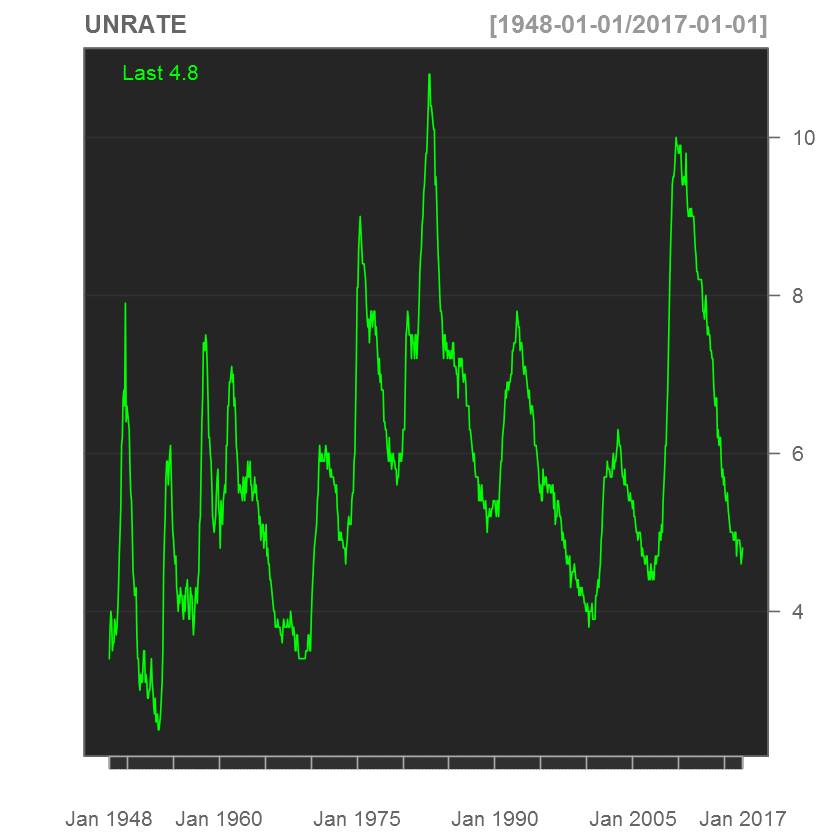

In [6]:
chartSeries(UNRATE)

In [7]:
getSymbols("FEDFUNDS", src="FRED")

[1] "FEDFUNDS"

In [8]:
head(FEDFUNDS)

           FEDFUNDS
1954-07-01     0.80
1954-08-01     1.22
1954-09-01     1.06
1954-10-01     0.85
1954-11-01     0.83
1954-12-01     1.28

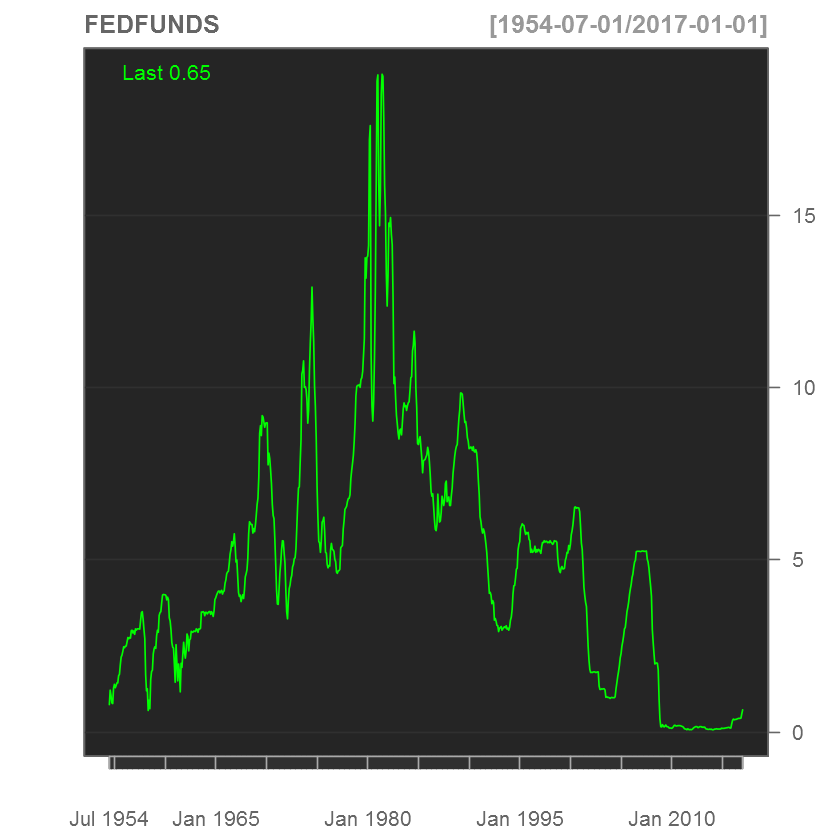

In [9]:
chartSeries(FEDFUNDS)

In [10]:
getSymbols("CPIAUCSL", src="FRED")

[1] "CPIAUCSL"

In [11]:
head(CPIAUCSL)

           CPIAUCSL
1947-01-01    21.48
1947-02-01    21.62
1947-03-01    22.00
1947-04-01    22.00
1947-05-01    21.95
1947-06-01    22.08

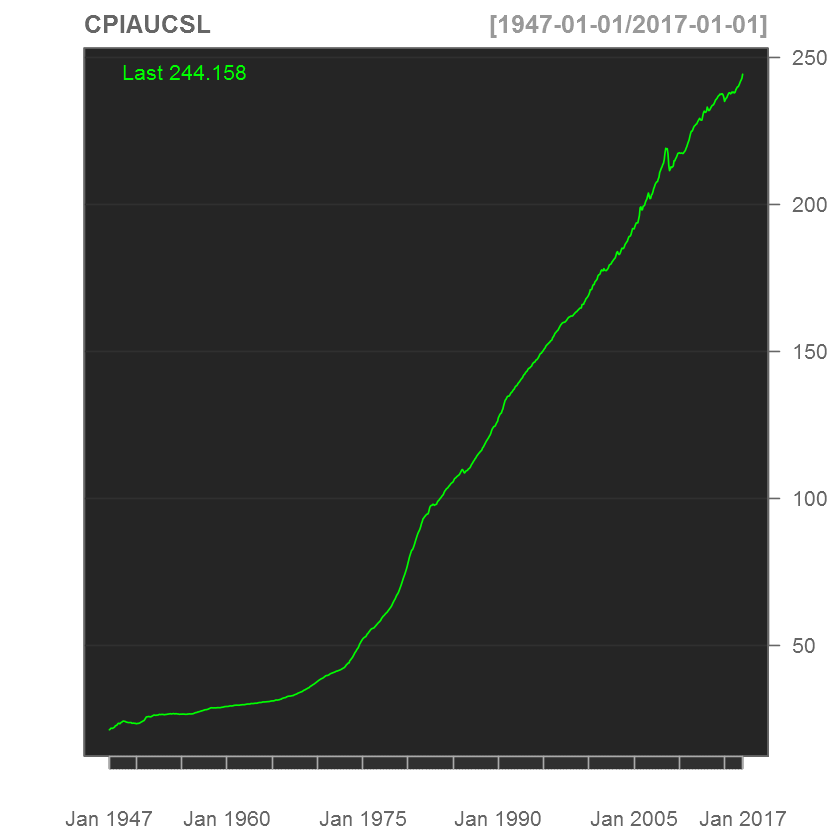

In [12]:
chartSeries(CPIAUCSL)

In [13]:
getSymbols("M1SL", src="FRED")

[1] "M1SL"

In [14]:
head(M1SL)

            M1SL
1959-01-01 138.9
1959-02-01 139.4
1959-03-01 139.7
1959-04-01 139.7
1959-05-01 140.7
1959-06-01 141.2

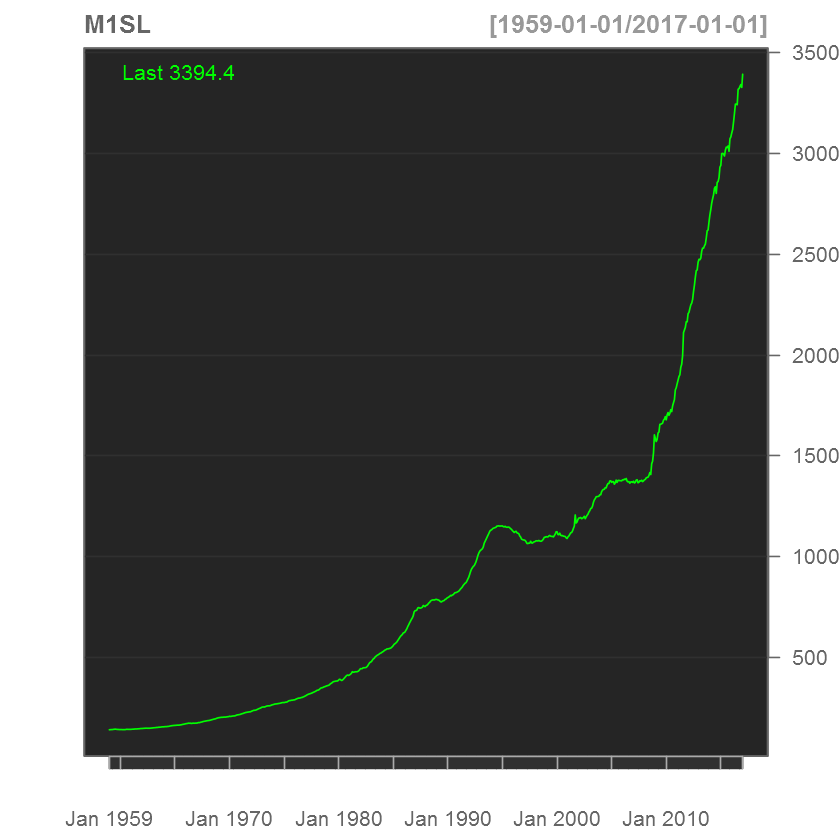

In [15]:
chartSeries(M1SL)

In [16]:
getSymbols("GDPDEF", src="FRED")

[1] "GDPDEF"

In [17]:
head(GDPDEF)

           GDPDEF
1947-01-01 12.566
1947-04-01 12.745
1947-07-01 12.957
1947-10-01 13.276
1948-01-01 13.379
1948-04-01 13.497

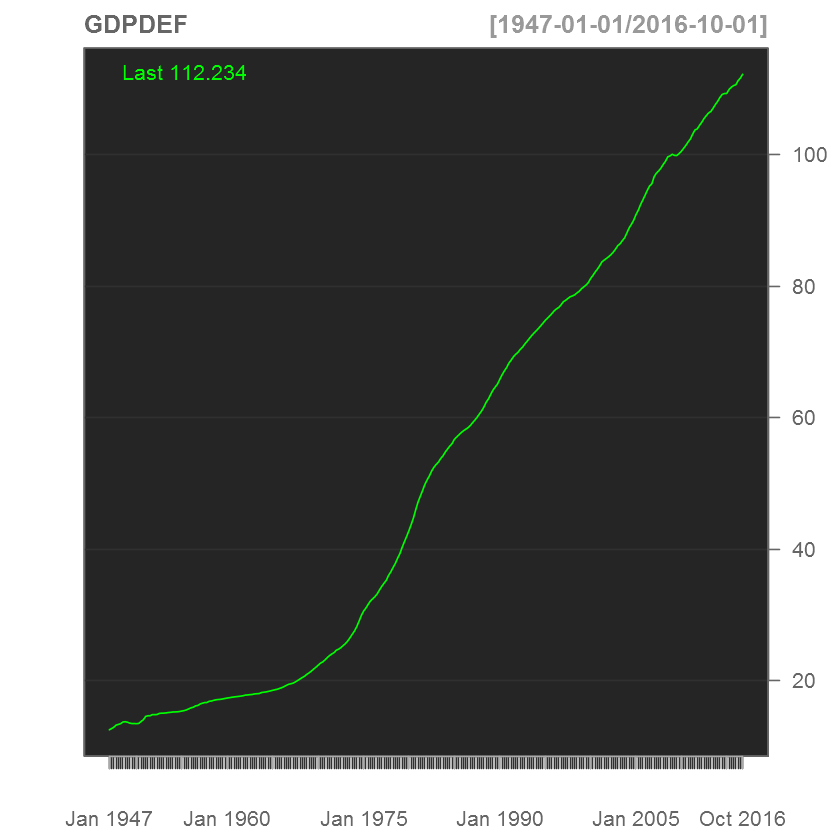

In [18]:
chartSeries(GDPDEF)

In [19]:
getSymbols("GDP", src="FRED")

[1] "GDP"

In [20]:
head(GDP)

             GDP
1947-01-01 243.1
1947-04-01 246.3
1947-07-01 250.1
1947-10-01 260.3
1948-01-01 266.2
1948-04-01 272.9

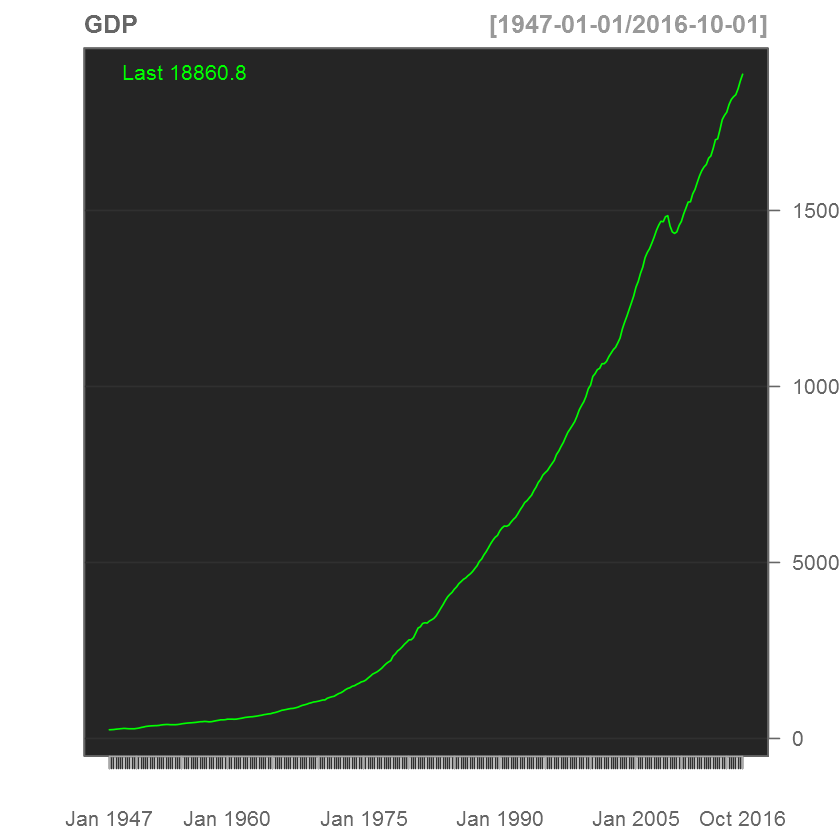

In [21]:
chartSeries(GDP)

In [22]:
getSymbols("TB3MS", src="FRED")

[1] "TB3MS"

In [23]:
head(TB3MS)

           TB3MS
1934-01-01  0.72
1934-02-01  0.62
1934-03-01  0.24
1934-04-01  0.15
1934-05-01  0.16
1934-06-01  0.15

In [24]:
getSymbols("TWEXBMTH", src="FRED")

[1] "TWEXBMTH"

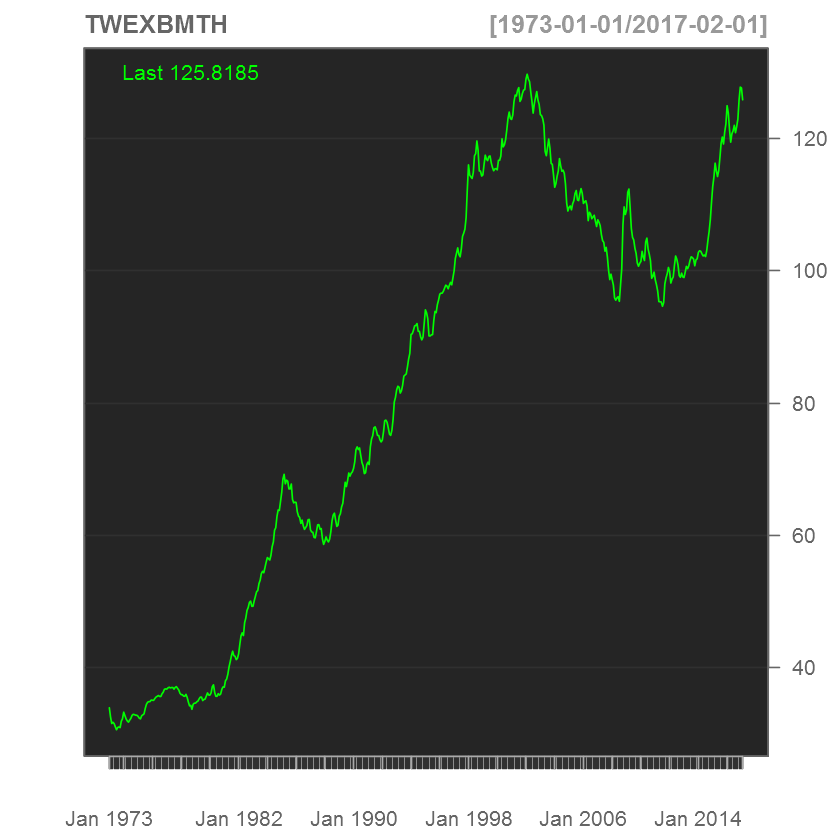

In [26]:
chartSeries(TWEXBMTH)

In [28]:
# Collect index data from Yahoo 
# 1.1.1 Set start and end date for collection in YYYYMMDD (numeric) format > 
date.start<-20000101 
date.end<-20170101
# 1.1.2 Collect historical data for S&P 500 Index 
SP500 <- getYahooData("^GSPC", start=date.start, end=date.end) 
head(SP500)

              Open    High     Low   Close     Volume
2000-01-03 1469.25 1478.00 1438.36 1455.22  931800000
2000-01-04 1455.22 1455.22 1397.43 1399.42 1009000000
2000-01-05 1399.42 1413.27 1377.68 1402.11 1085500000
2000-01-06 1402.11 1411.90 1392.10 1403.45 1092300000
2000-01-07 1403.45 1441.47 1400.73 1441.47 1225200000
2000-01-10 1441.47 1464.36 1441.47 1457.60 1064800000

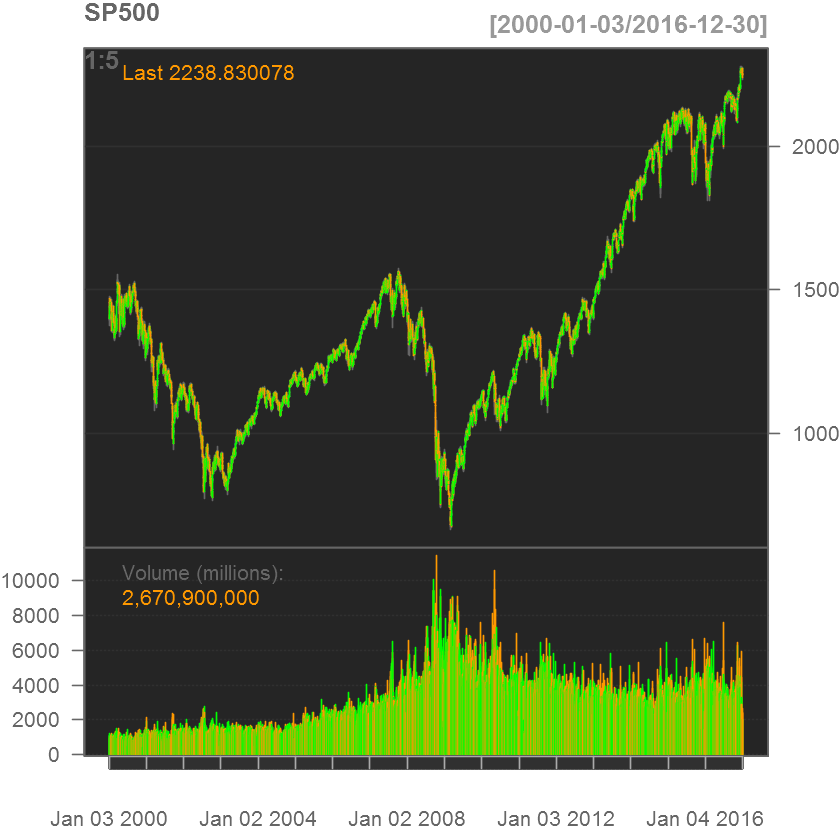

In [29]:
chartSeries(SP500[,1:5])

### 1.3 Ordinary and Partial Autocorrelations of Reduced Set


In [30]:

# Consider focusing on 3 variables

ymat0<-merge(UNRATE, FEDFUNDS, CPIAUCSL) 
ind.quarterly0<-1*(is.na(ymat0[,3])==FALSE) 
sum(ind.quarterly0)



[1] 841

In [31]:
dim(ymat0)

[1] 841   3

In [32]:
ymat00<-ymat0[which(ind.quarterly0==1),]

In [33]:
head(ymat00)

           UNRATE FEDFUNDS CPIAUCSL
1947-01-01     NA       NA    21.48
1947-02-01     NA       NA    21.62
1947-03-01     NA       NA    22.00
1947-04-01     NA       NA    22.00
1947-05-01     NA       NA    21.95
1947-06-01     NA       NA    22.08

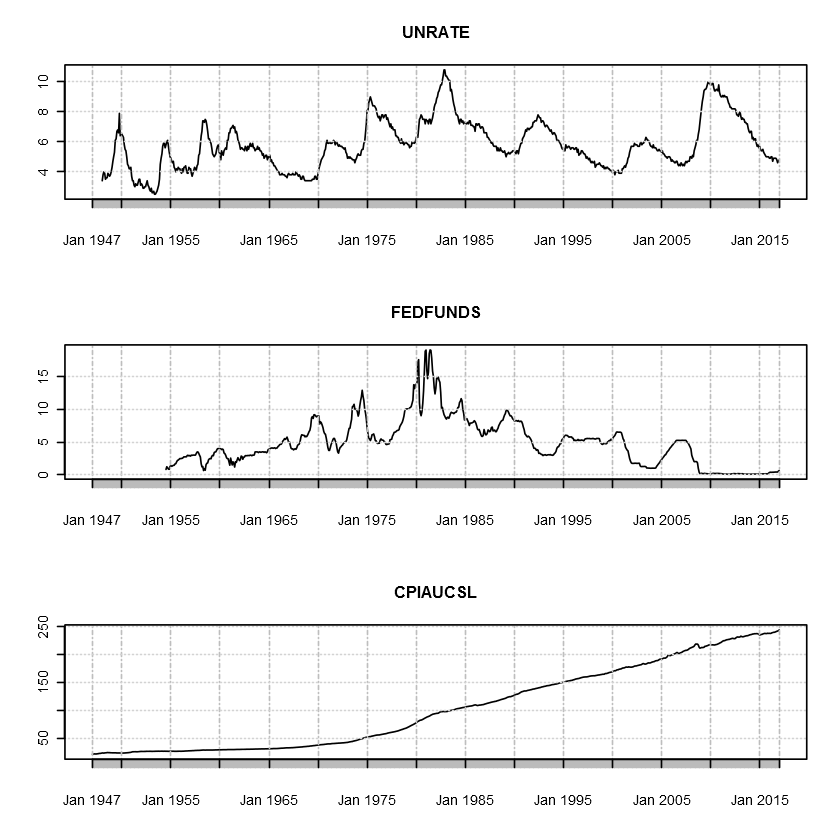

In [34]:
par(mfcol=c(3,1)) 
plot(ymat00[,1],main=dimnames(ymat00)[[2]][1]) 
plot(ymat00[,2],main=dimnames(ymat00)[[2]][2]) 
plot(ymat00[,3],main=dimnames(ymat00)[[2]][3])

In [35]:
# Extract window from 1960-2000 > > 
ymat00.0<-window(ymat00, 
                 start = as.Date("1960-01-01"), end = as.Date("2000-12-31"))

dim(ymat00.0)

[1] 492   3

In [36]:
head(ymat00.0)

           UNRATE FEDFUNDS CPIAUCSL
1960-01-01    5.2     3.99    29.37
1960-02-01    4.8     3.97    29.41
1960-03-01    5.4     3.84    29.41
1960-04-01    5.2     3.92    29.54
1960-05-01    5.1     3.85    29.57
1960-06-01    5.4     3.32    29.61

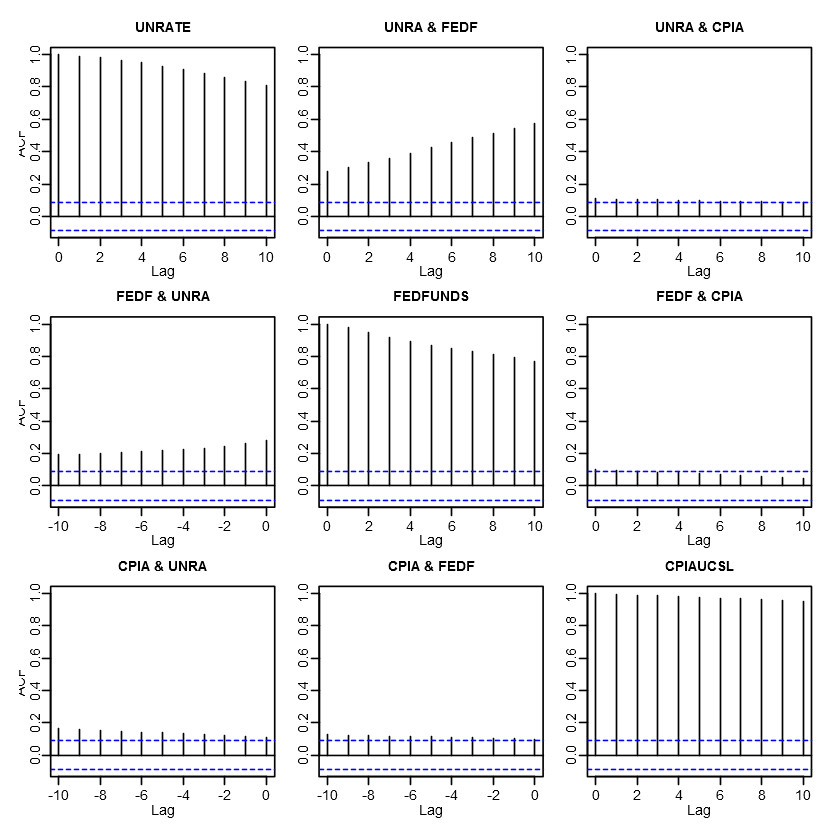

In [37]:
acf(ymat00.0, lag.max=10)

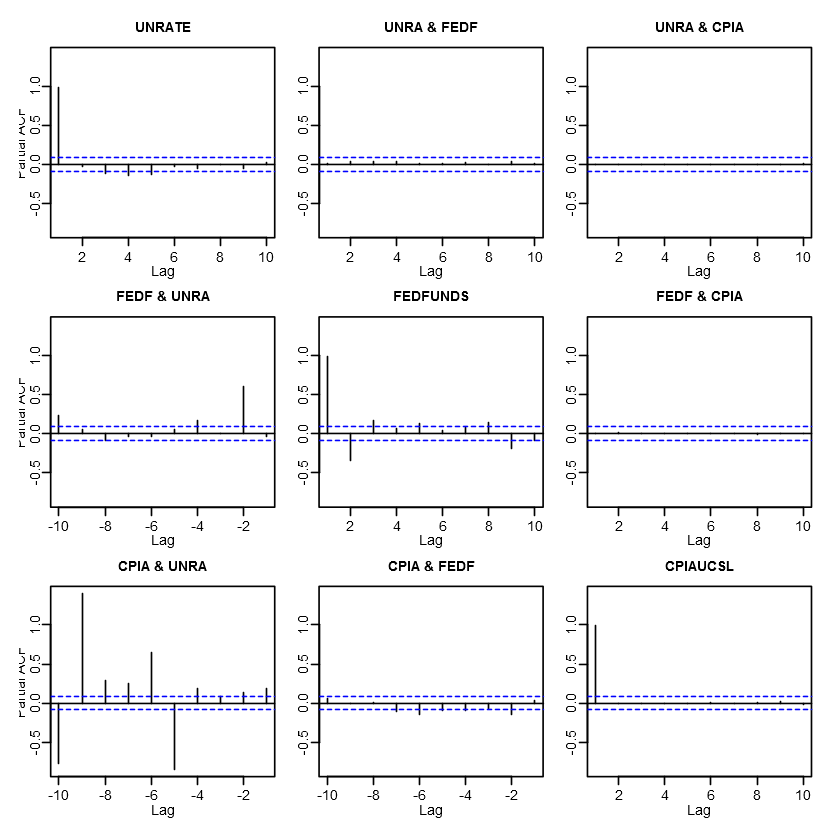

In [38]:
acf(ymat00.0, type="partial", lag.max=10)

### 1.4 Vector Autoregressive (VAR) Model of Reduced Set


In [39]:

# The function VARselect() is from the package vars; see Pfaff(2008). 
# This function identifies the optimal VAR(p) order p. 
ymat00.0.VAR.const<-VARselect(ymat00.0, lag.max=12, type="const") 
# Print out the VAR order identified by different information criteria 
ymat00.0.VAR.const$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
    12      5      2     12

In [44]:
# Fit the VAR model corresponding to the Schwarz Criterion (SC) which is the BIC 
ymat00.0.VAR.const.0<-VAR(ymat00.0, p=ymat00.0.VAR.const$selection[3],type="const") 
options(show.signif.stars=T)

In [45]:
summary(ymat00.0.VAR.const.0)


VAR Estimation Results:
Endogenous variables: UNRATE, FEDFUNDS, CPIAUCSL 
Deterministic variables: const 
Sample size: 490 
Log Likelihood: -90.684 
Roots of the characteristic polynomial:
1.002 0.9863 0.9524 0.4675 0.3314 0.08405
Call:
VAR(y = ymat00.0, p = ymat00.0.VAR.const$selection[3], type = "const")


Estimation results for equation UNRATE: 
UNRATE = UNRATE.l1 + FEDFUNDS.l1 + CPIAUCSL.l1 + UNRATE.l2 + FEDFUNDS.l2 + CPIAUCSL.l2 + const 

            Estimate Std. Error t value Pr(>|t|)    
UNRATE.l1    0.97239    0.04593  21.171  < 2e-16 ***
FEDFUNDS.l1 -0.02928    0.01363  -2.148  0.03222 *  
CPIAUCSL.l1  0.01744    0.04114   0.424  0.67176    
UNRATE.l2    0.01157    0.04557   0.254  0.79974    
FEDFUNDS.l2  0.04348    0.01373   3.168  0.00163 ** 
CPIAUCSL.l2 -0.01777    0.04121  -0.431  0.66642    
const        0.02390    0.03558   0.672  0.50212    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.177 on 483 degrees of freedom
M

### 1.5 Impulse Response Functions for a Fitted VAR(p) Model
The impulse response function measure the impact of a unit innovation (impulse) in a given variable on all the dependent variables in the VAR model.

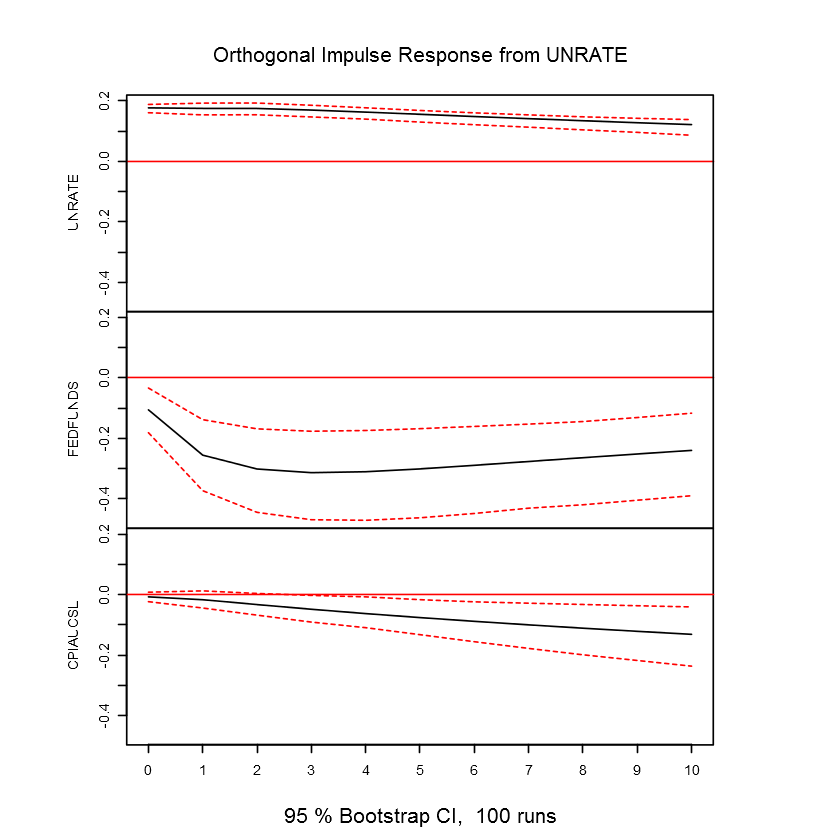

In [46]:
plot(irf(ymat00.0.VAR.const.0, impulse="UNRATE"))

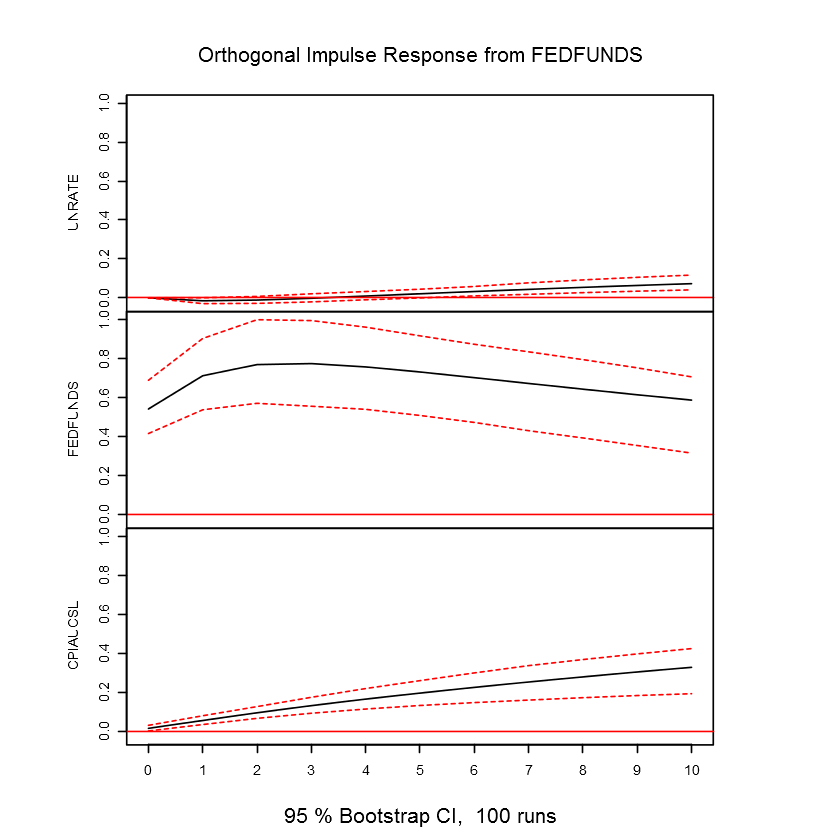

In [47]:
plot(irf(ymat00.0.VAR.const.0, impulse="FEDFUNDS"))

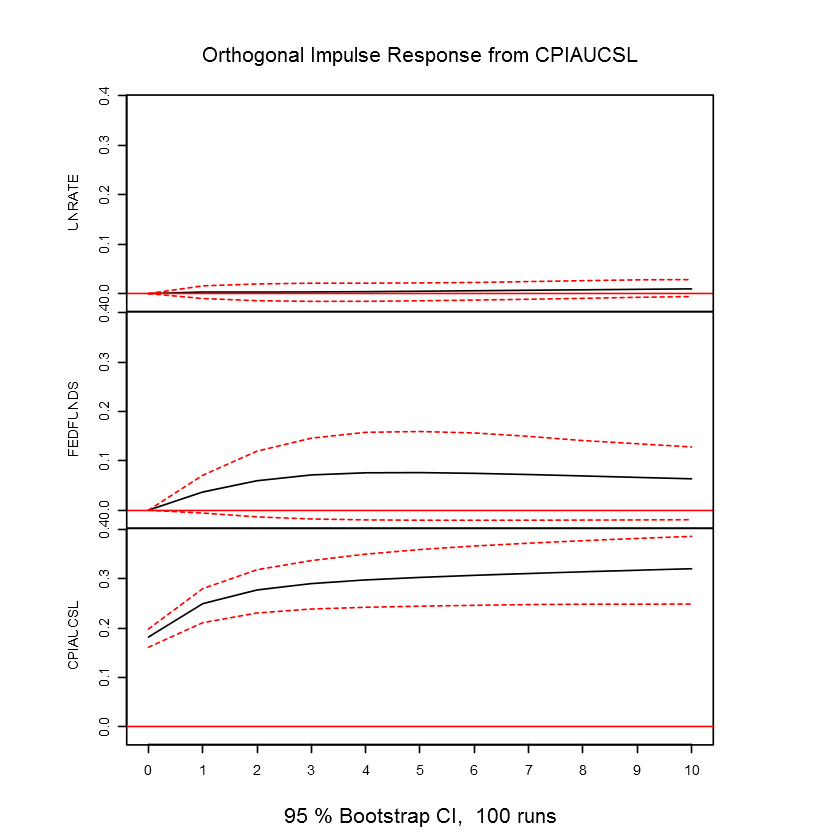

In [48]:
plot(irf(ymat00.0.VAR.const.0, impulse="CPIAUCSL"))

In [49]:
###1.6 Ordinary and Partial Autocorrelations of Differenced Series

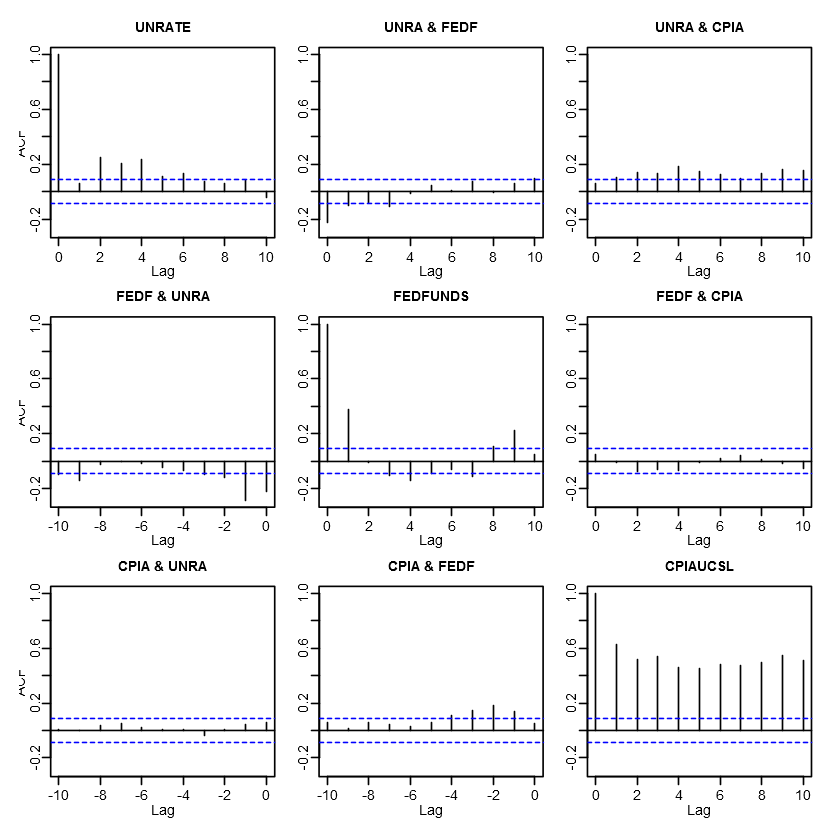

In [50]:
ymat000.0<-na.omit(diff(ymat00.0)) 
acf(ymat000.0, lag.max=10)

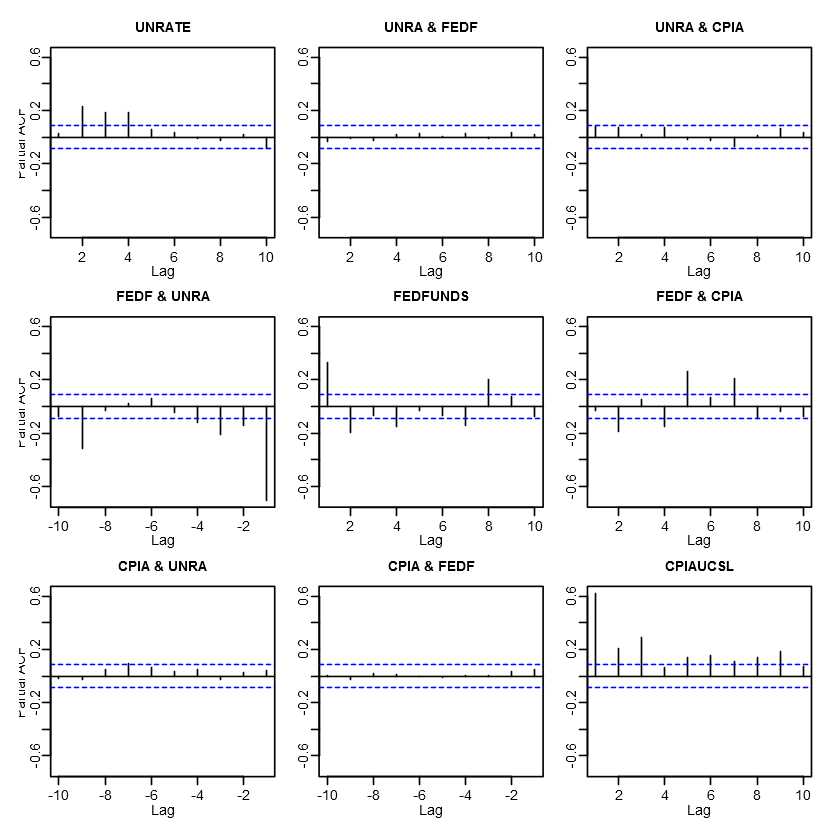

In [51]:
acf(ymat000.0, type="partial", lag.max=10)

### 1.7 Vector Autoregressive (VAR) Model with Differenced Series

In [52]:
# The function VARselect() is from the package vars; see Pfaff(2008). 
# This function identifies the optimal VAR(p) order p. 
ymat000.0.VAR.const<-VARselect(ymat000.0, lag.max=12, type="const") 
# Print out the VAR order identified by different information criteria 
ymat000.0.VAR.const$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
    12      3      3     12

In [53]:
# Fit the VAR model corresponding to the Schwarz Criterion (SC) which is the BIC 

ymat000.0.VAR.const.0<-VAR(ymat000.0, p=ymat000.0.VAR.const$selection[3],type="const")
summary(ymat000.0.VAR.const.0)


VAR Estimation Results:
Endogenous variables: UNRATE, FEDFUNDS, CPIAUCSL 
Deterministic variables: const 
Sample size: 488 
Log Likelihood: -69.438 
Roots of the characteristic polynomial:
0.8369 0.7659 0.584 0.584 0.5755 0.5755 0.4907 0.4907 0.3088
Call:
VAR(y = ymat000.0, p = ymat000.0.VAR.const$selection[3], type = "const")


Estimation results for equation UNRATE: 
UNRATE = UNRATE.l1 + FEDFUNDS.l1 + CPIAUCSL.l1 + UNRATE.l2 + FEDFUNDS.l2 + CPIAUCSL.l2 + UNRATE.l3 + FEDFUNDS.l3 + CPIAUCSL.l3 + const 

             Estimate Std. Error t value Pr(>|t|)    
UNRATE.l1   -0.007647   0.045642  -0.168   0.8670    
FEDFUNDS.l1 -0.010946   0.014641  -0.748   0.4551    
CPIAUCSL.l1  0.033734   0.040703   0.829   0.4076    
UNRATE.l2    0.220669   0.044850   4.920 1.19e-06 ***
FEDFUNDS.l2  0.016837   0.015397   1.094   0.2747    
CPIAUCSL.l2  0.060812   0.044099   1.379   0.1685    
UNRATE.l3    0.182936   0.045599   4.012 6.99e-05 ***
FEDFUNDS.l3 -0.027506   0.014294  -1.924   0.0549 .  
CPIA

In [62]:
## Checking the roots 
roots(ymat000.0.VAR.const.0)

[1] 0.8369122 0.7658618 0.5840068 0.5840068 0.5755307 0.5755307 0.4907476
[8] 0.4907476 0.3088000

### .8 Impulse Response Functions for VAR(p) Fit of Differenced Series

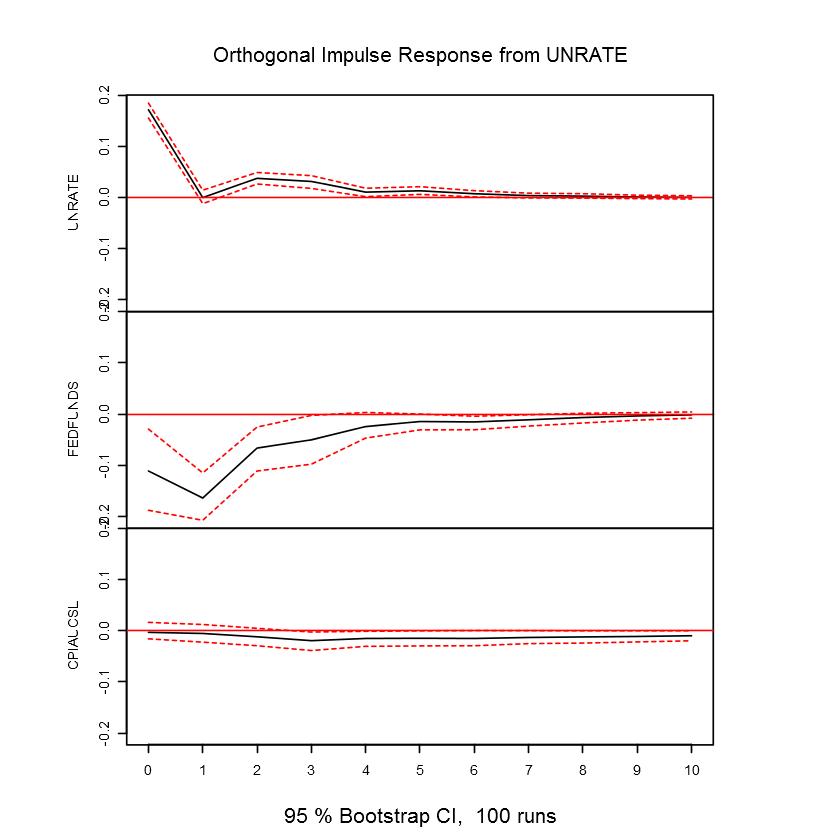

In [54]:
plot(irf(ymat000.0.VAR.const.0, impulse="UNRATE"))

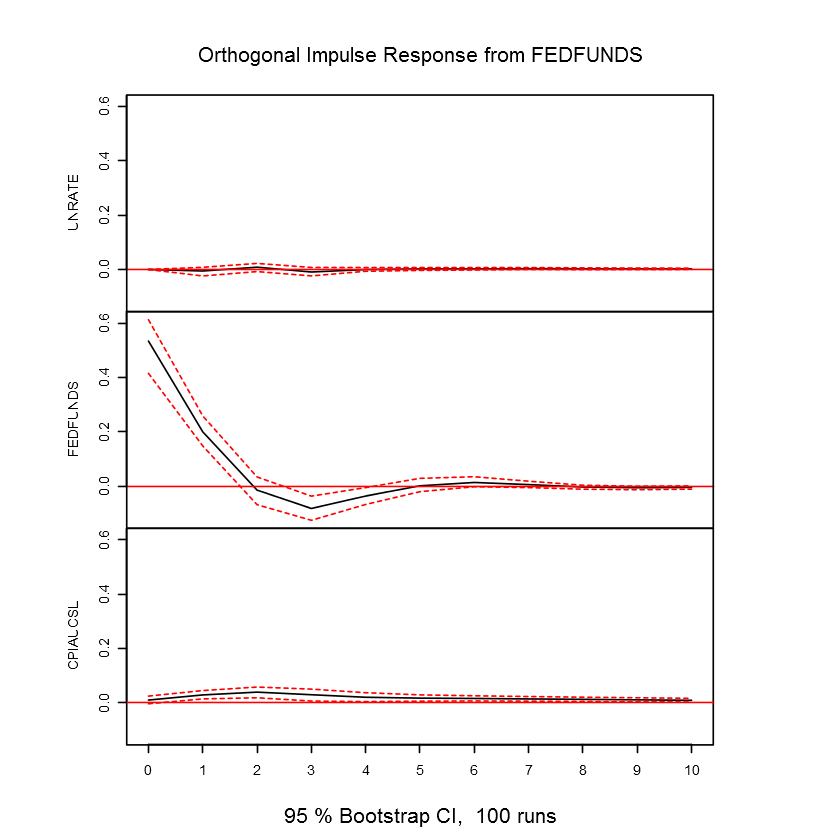

In [56]:
plot(irf(ymat000.0.VAR.const.0, impulse="FEDFUNDS"))

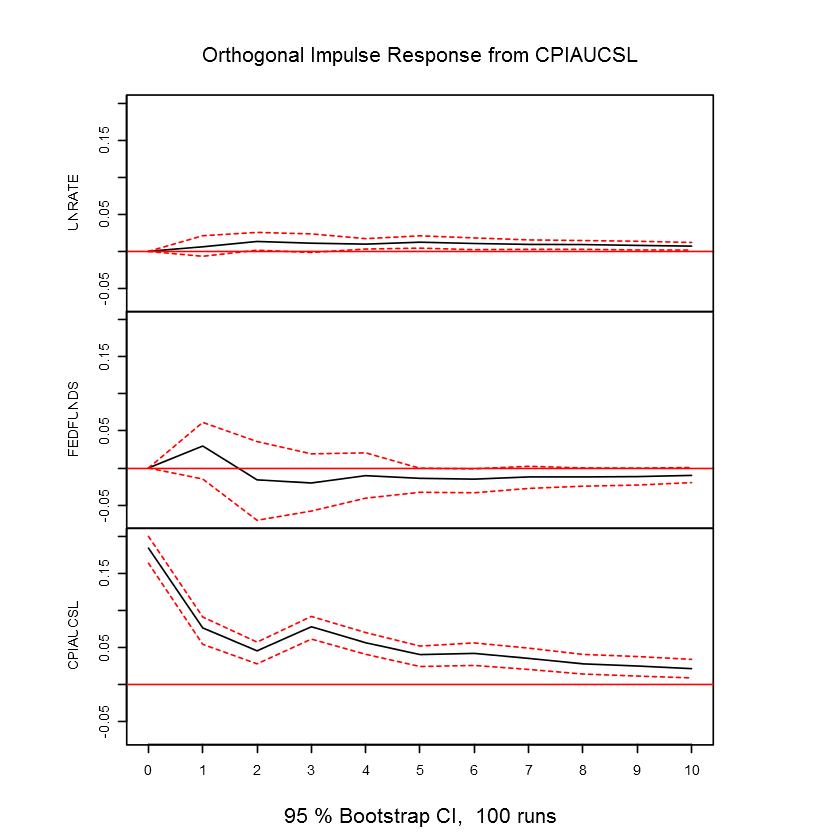

In [57]:
plot(irf(ymat000.0.VAR.const.0, impulse="CPIAUCSL"))

Interpreting the impulse response functions for the VAR model of the differenced series, we note:


• When unemployment increases, the Fed Funds rate tends to decrease over subsequent quarters, consistent with Federal Reserve policies (i.e., stimulating economic growth and employment with lower interest rates).


• When the Fed Funds rate increases, there is a modest increase in inflation (CPIA). This is consistent with the Fed raising rates to control inflation which tends to persist for several quarters (note the high 3-rd quarter lag partial autocorrelation in CPIAUCSL).



• When inflation (CPIAUCSL) increases, unemployment tends to rise modestly, and the Fed Funds rate tends to increase.

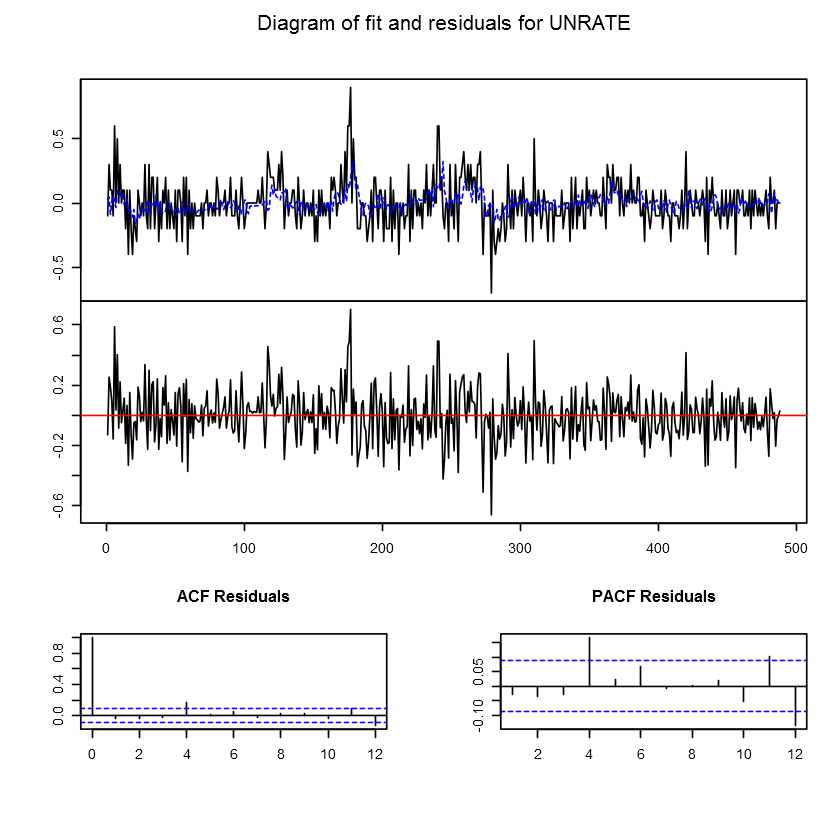

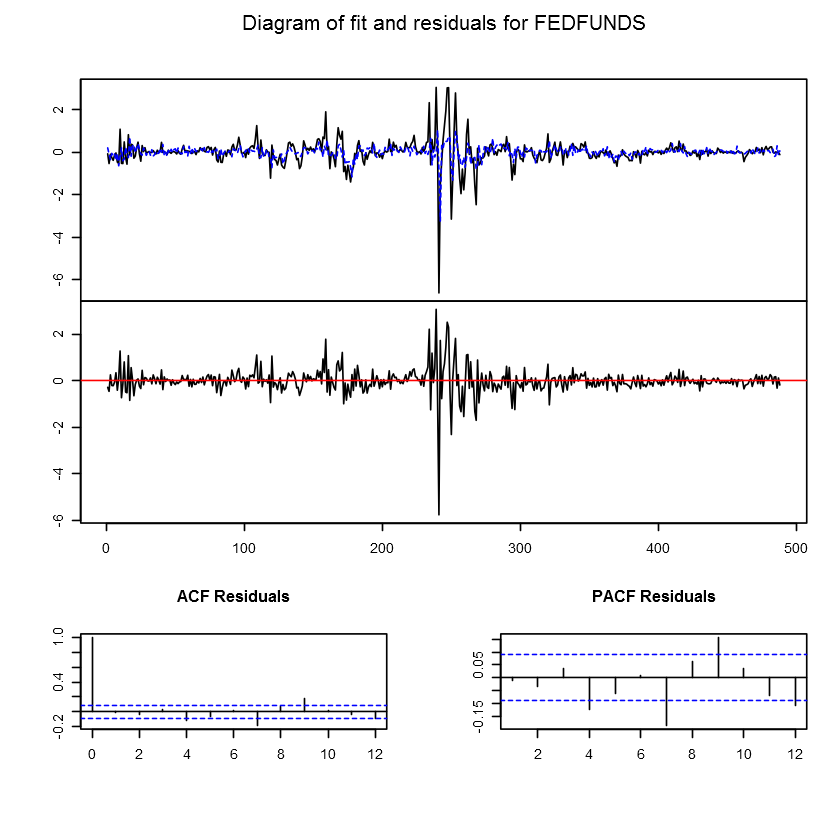

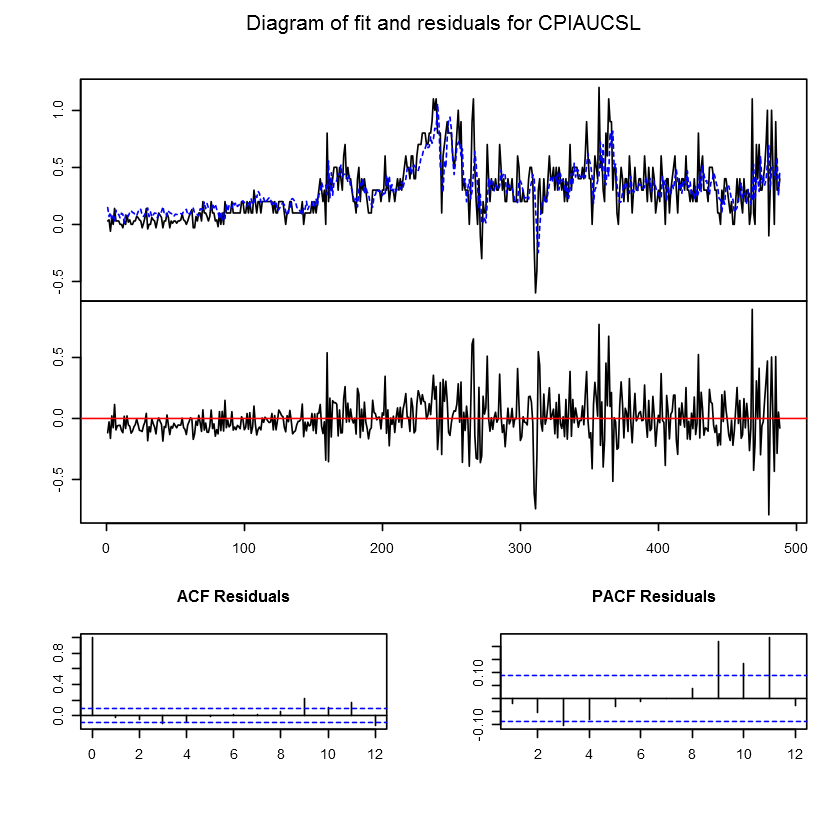

In [55]:
plot(ymat000.0.VAR.const.0)

In [59]:
ymat000.0.VAR.const.1<-ca.jo(ymat000.0, ecdet = "none", type = "eigen", K = 2,
                             spec = "longrun", season = 4)
summary(ymat000.0.VAR.const.1)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.3691256 0.2254963 0.1149731

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 2 |  59.73  6.50  8.18 11.65
r <= 1 | 124.96 12.91 14.90 19.19
r = 0  | 225.26 18.90 21.07 25.75

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             UNRATE.l2 FEDFUNDS.l2 CPIAUCSL.l2
UNRATE.l2    1.0000000  1.00000000  1.00000000
FEDFUNDS.l2  0.4982952 -0.05954924  0.06623281
CPIAUCSL.l2 -0.2024001 -0.12756540  3.57602939

Weights W:
(This is the loading matrix)

            UNRATE.l2 FEDFUNDS.l2   CPIAUCSL.l2
UNRATE.d   -0.1027585 -0.62725940  0.0001582655
FEDFUNDS.d -1.5222133  0.73989097 -0.0706947341
CPIAUCSL.d  0.1529077 -0.02135215 -0.0785400417


In [60]:
vec2var <- vec2var(ymat000.0.VAR.const.1, r = 2)

In [61]:
eigen(vec2var$A$A1)

0.03302574,-0.02867665,-0.4323240
0.66996212,0.98194850,-0.8937400
0.74166034,-0.18696201,0.1196859
